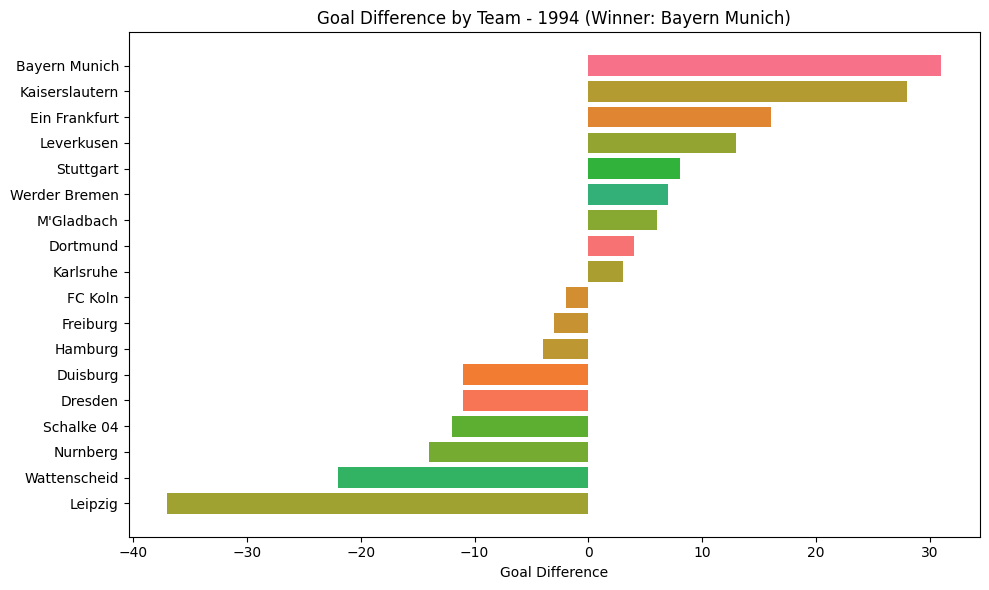

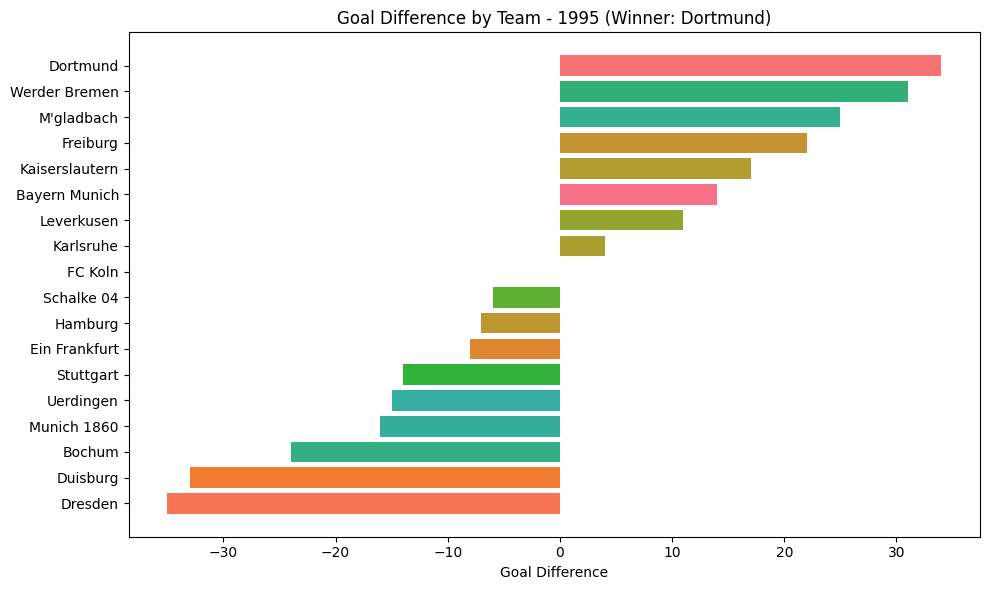

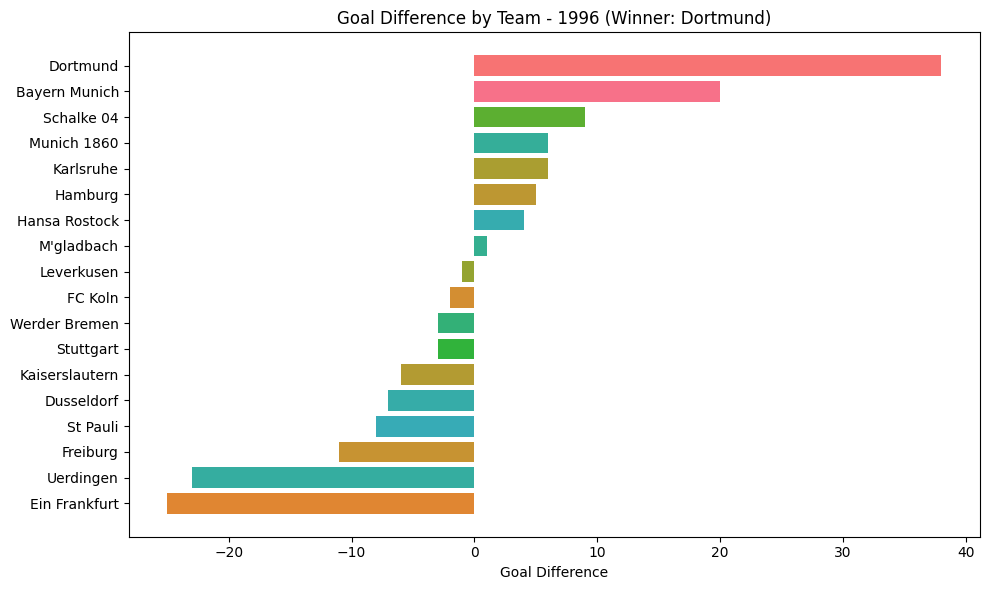

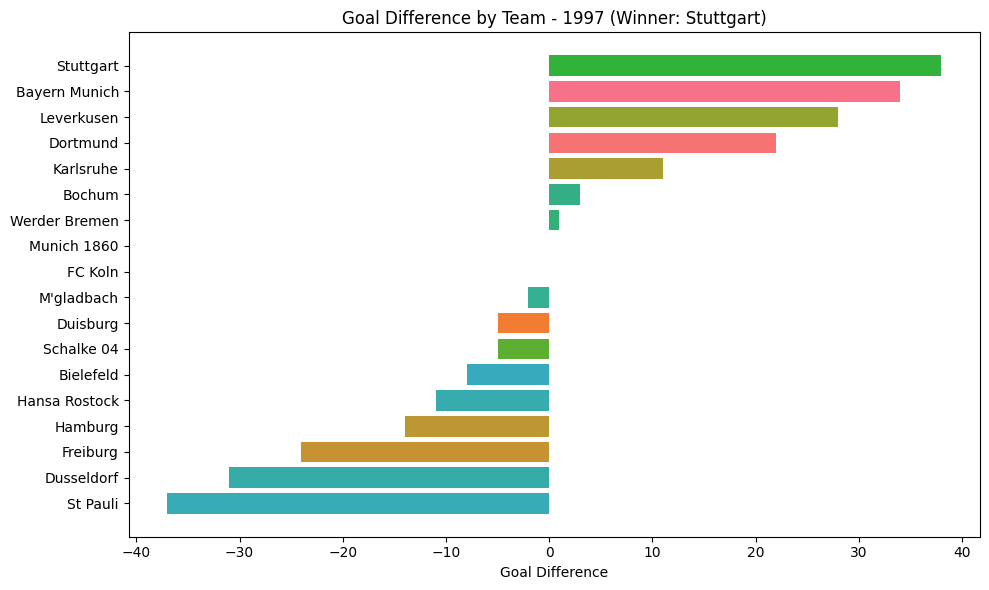

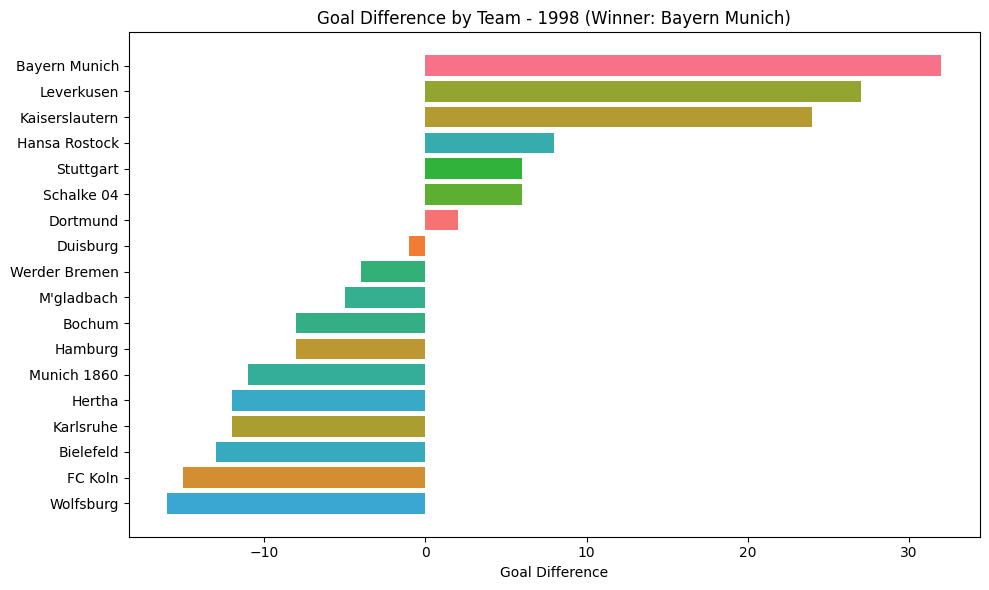

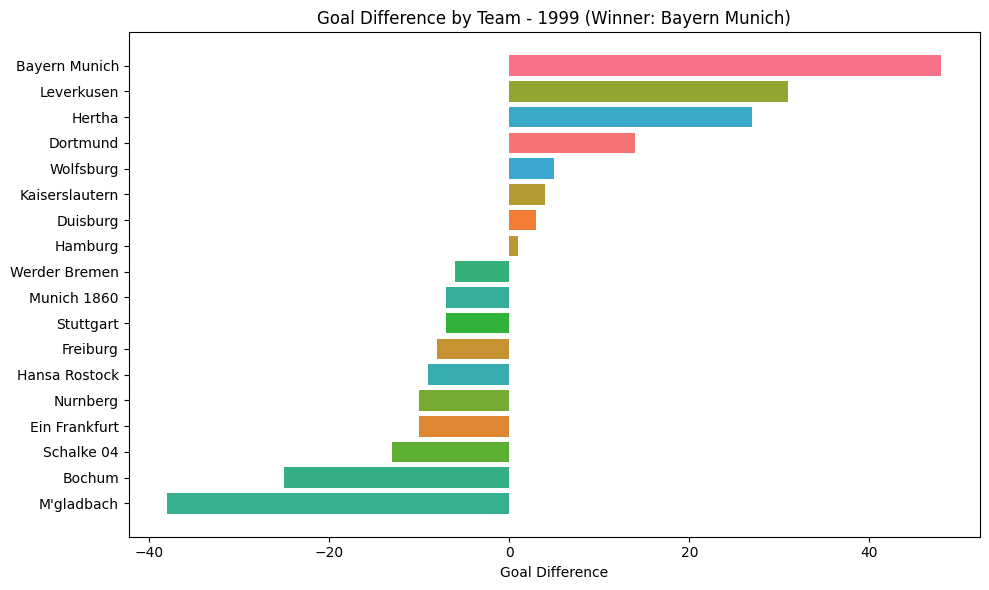

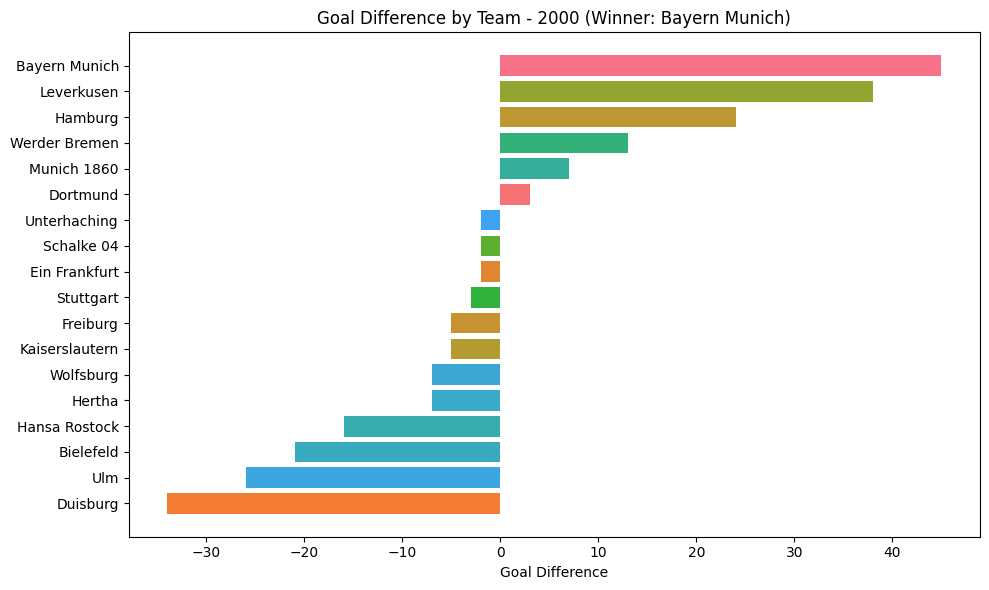

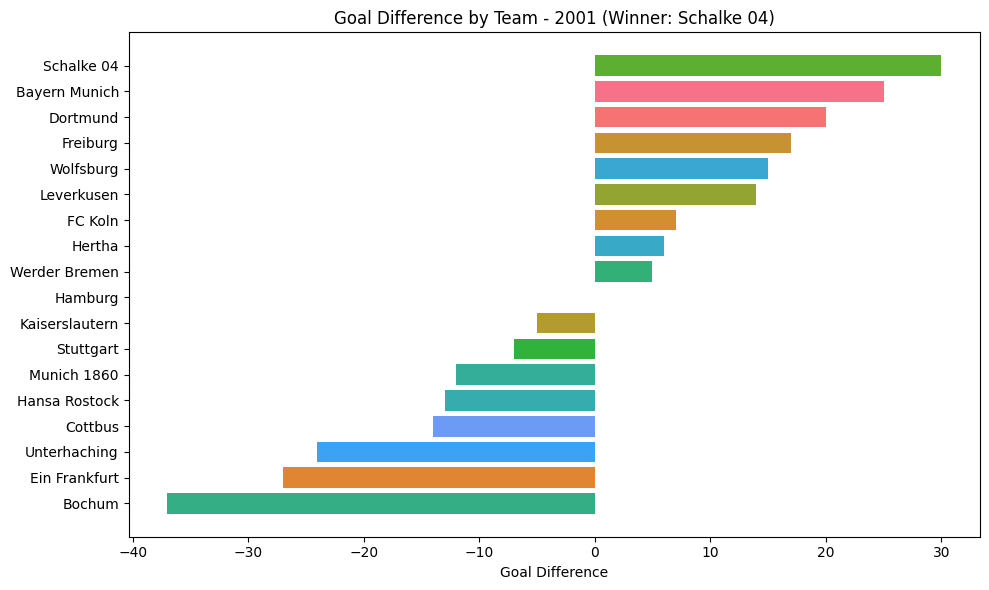

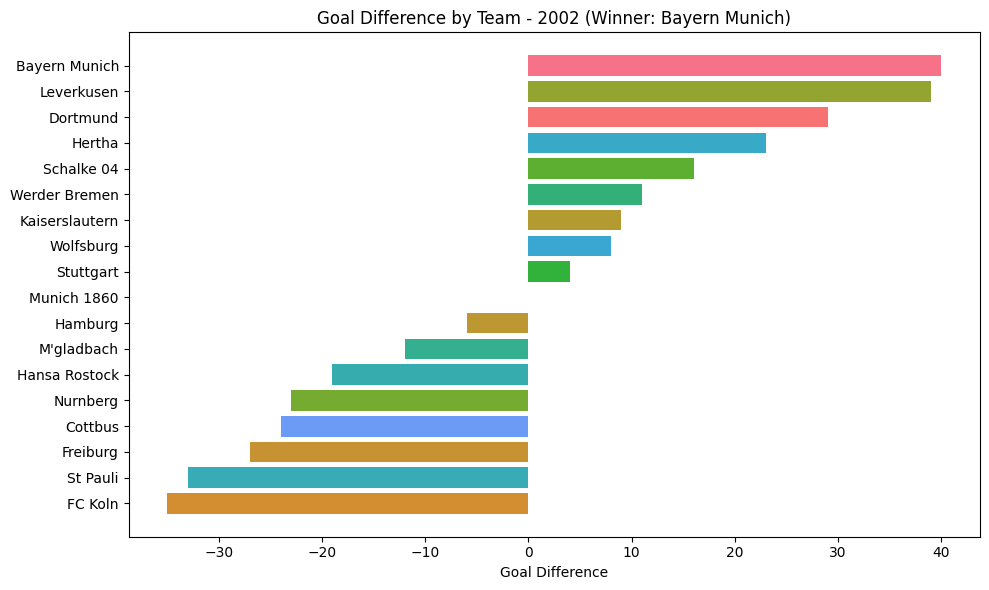

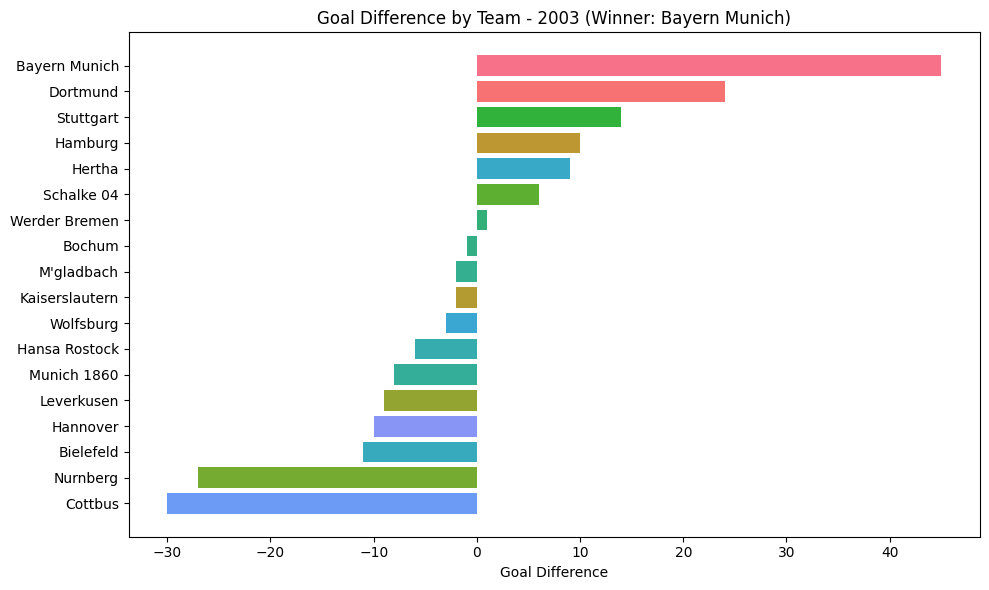

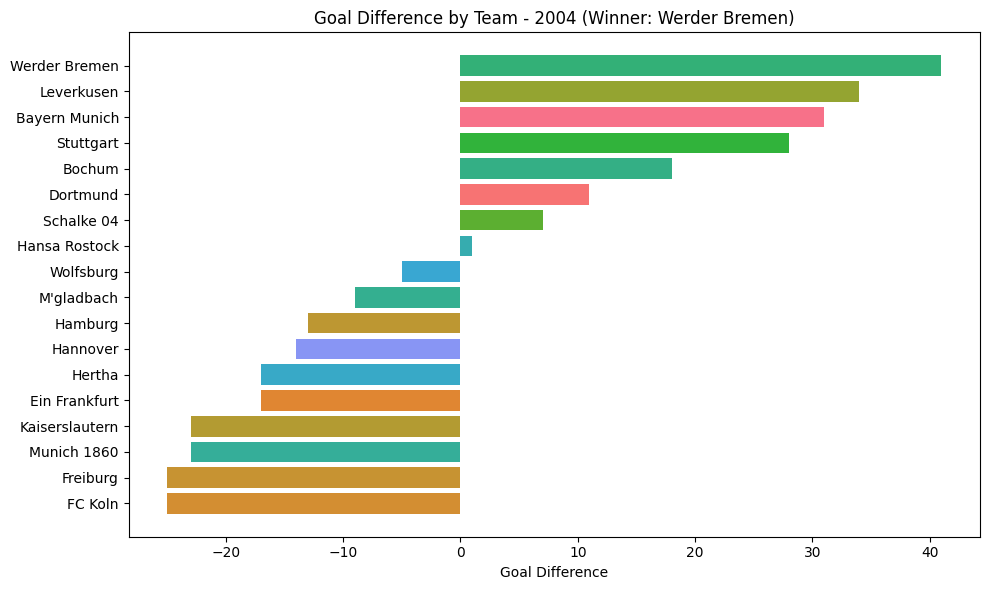

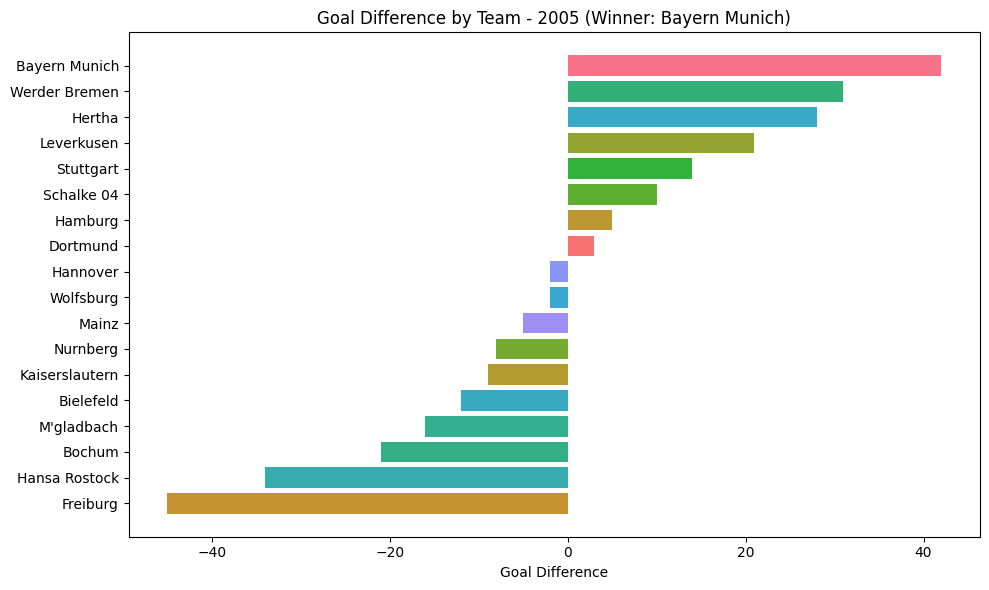

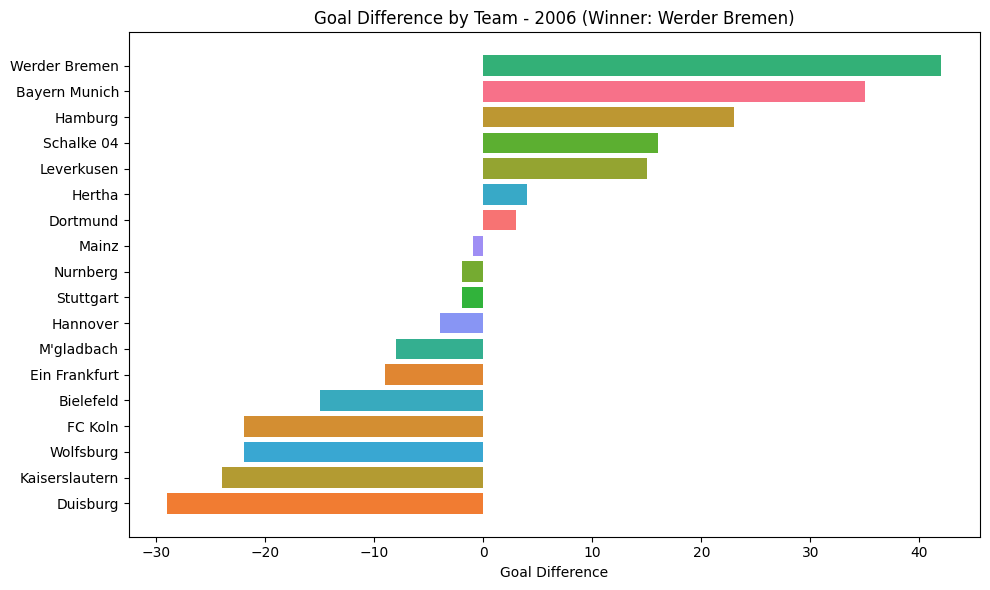

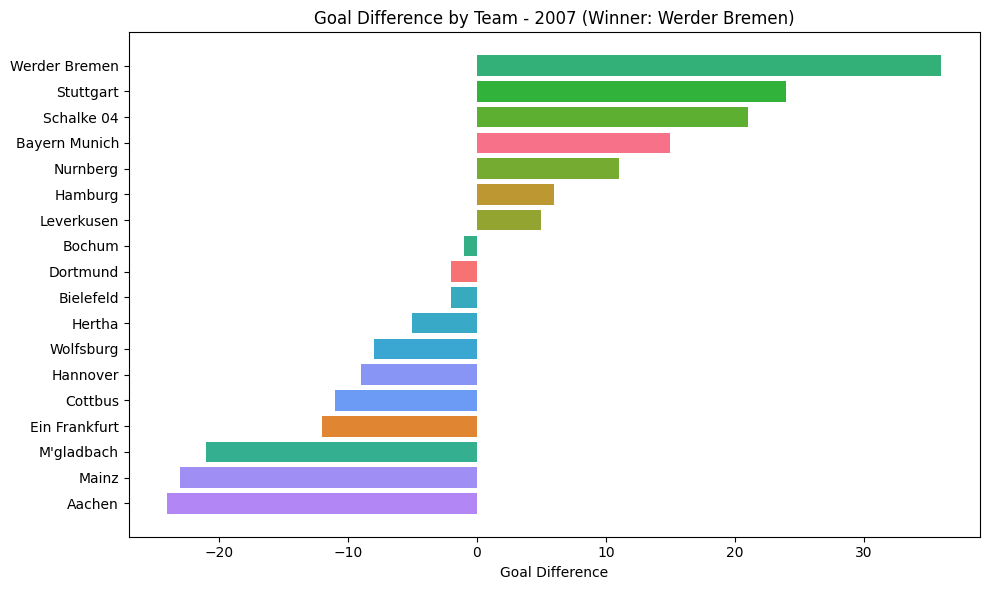

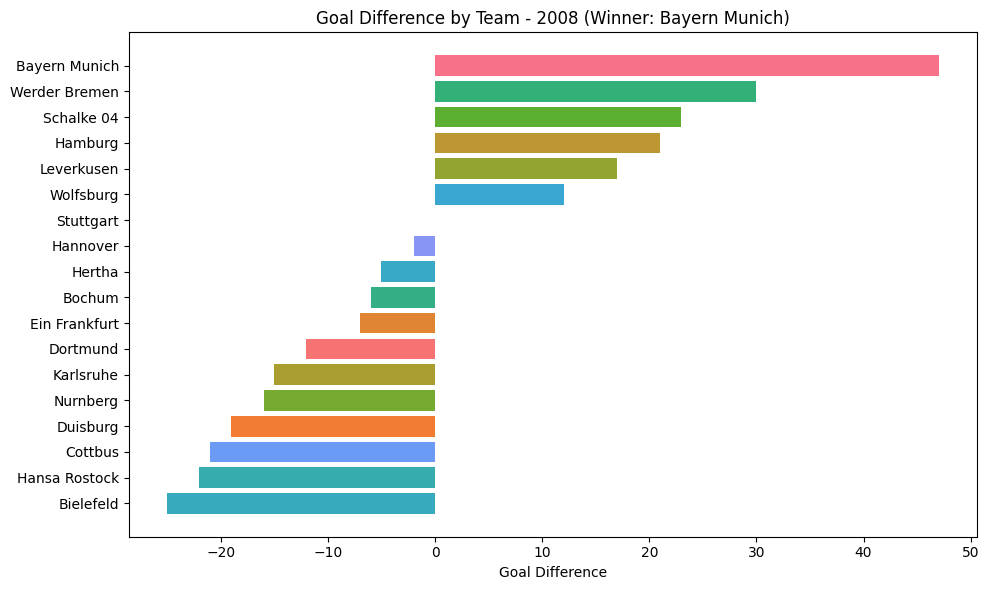

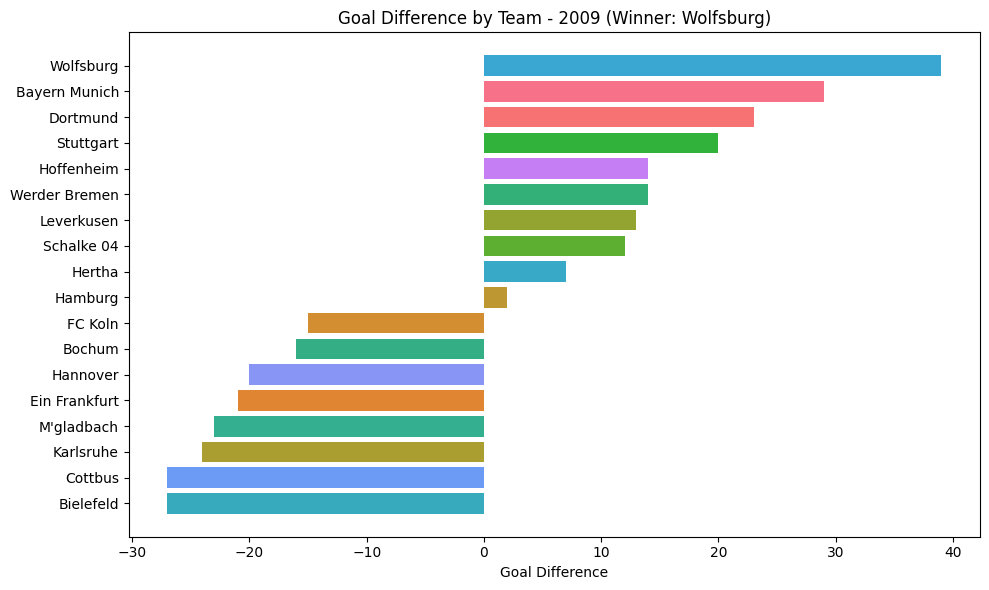

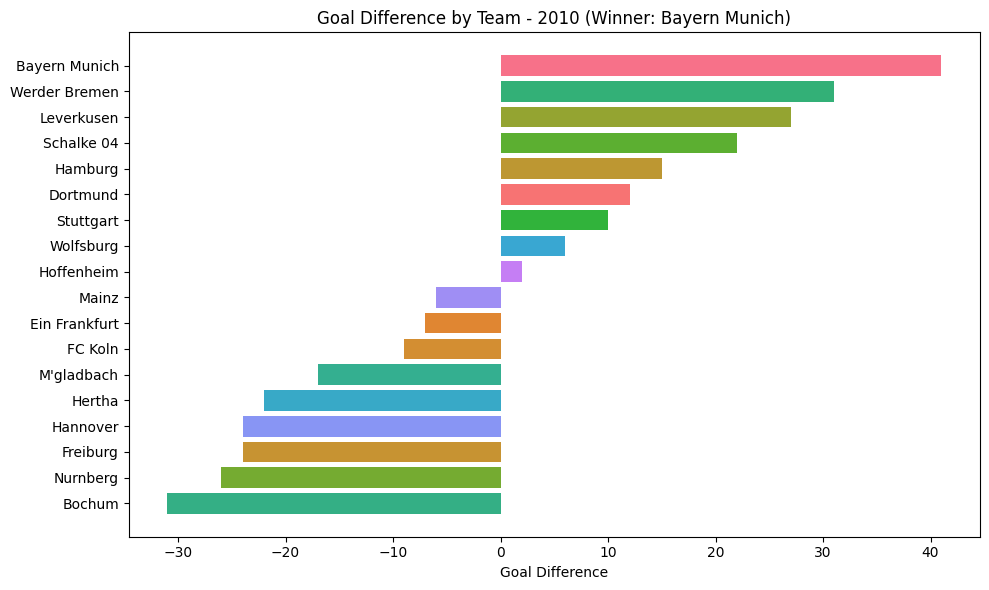

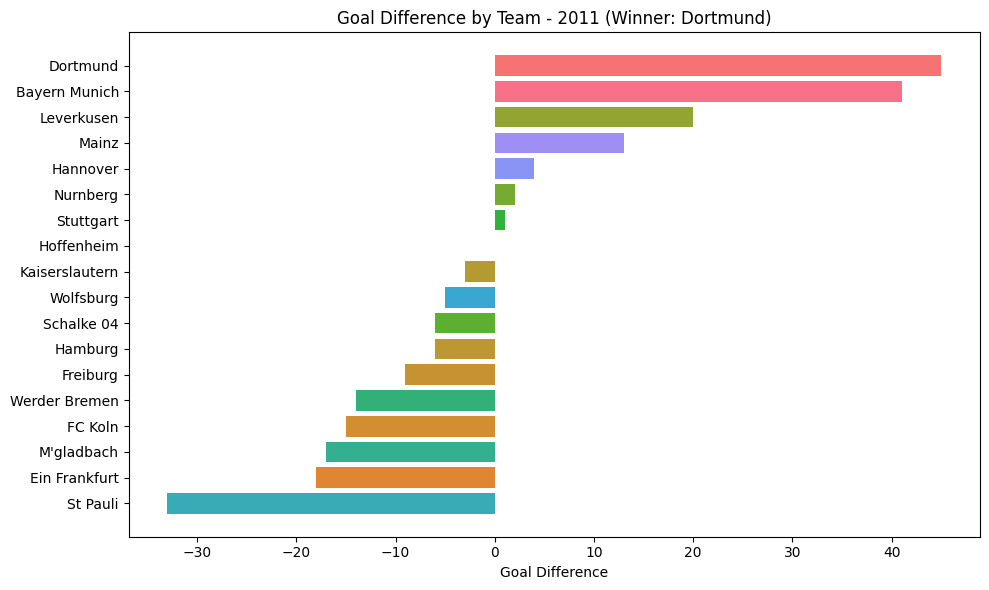

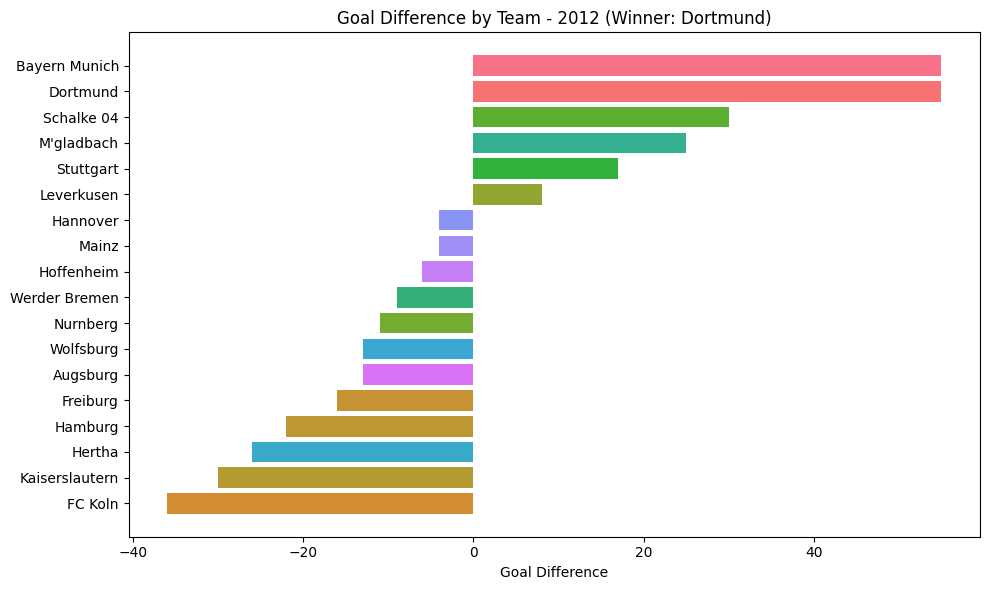

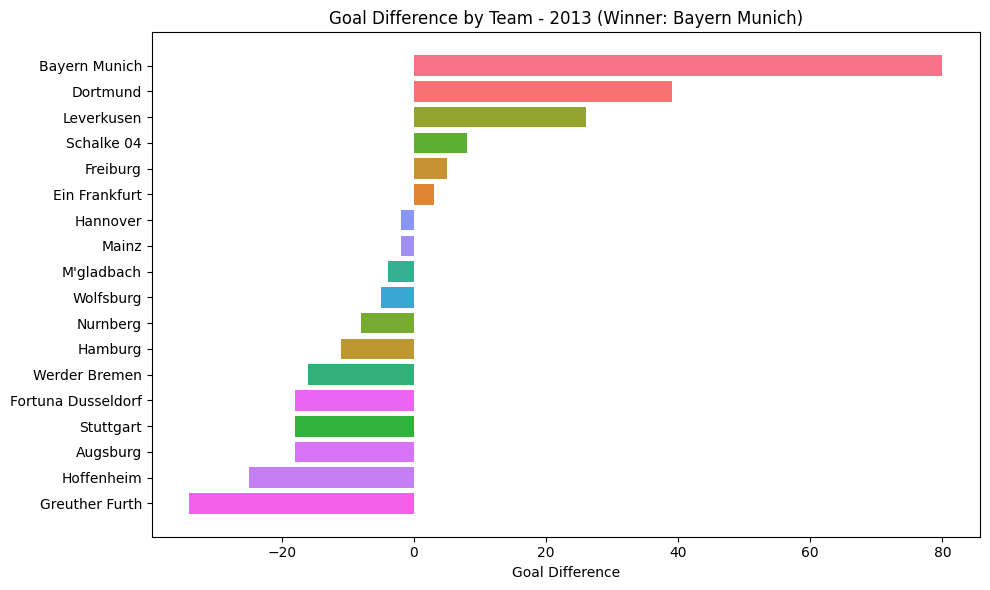

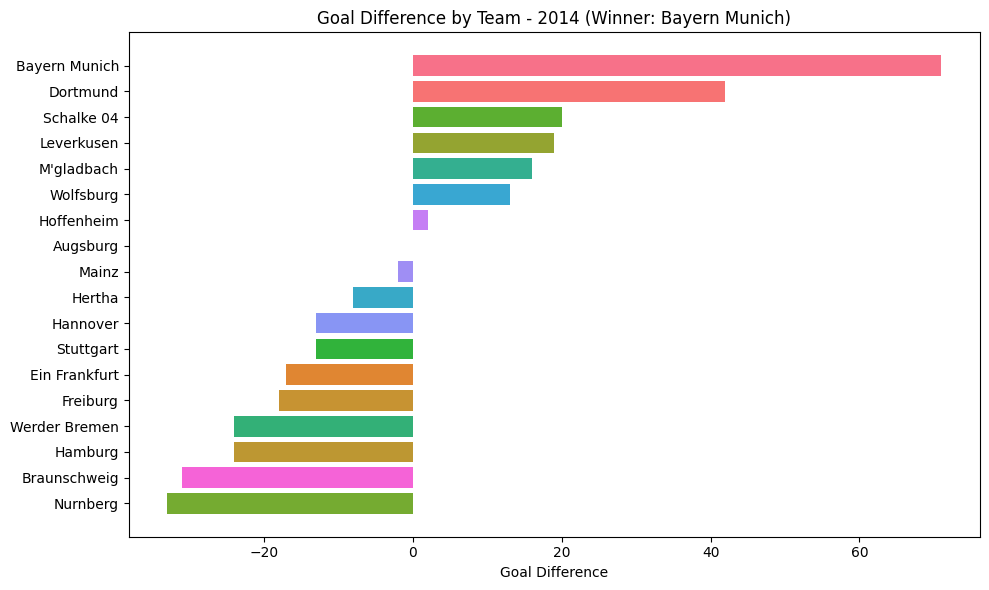

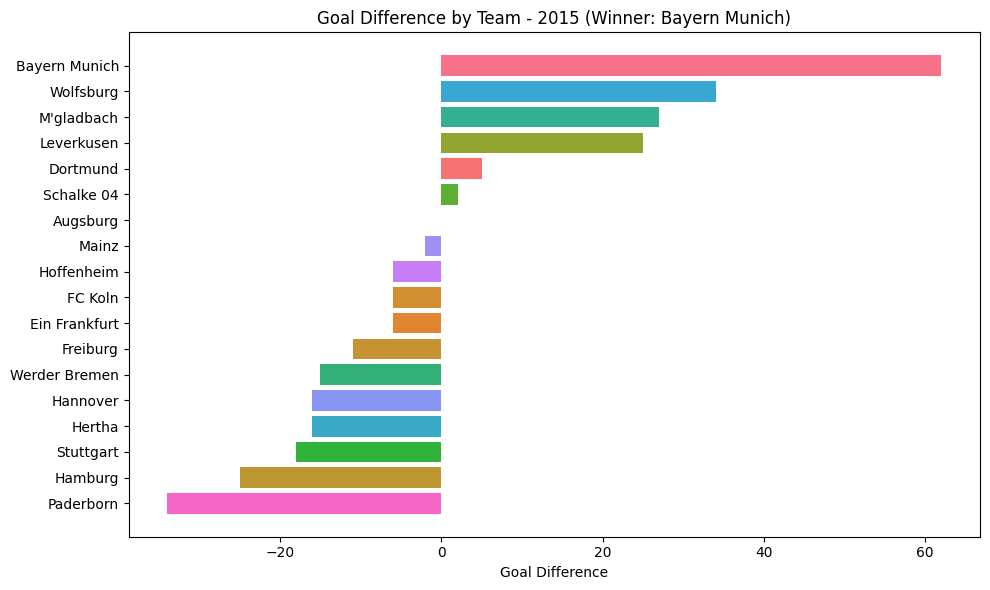

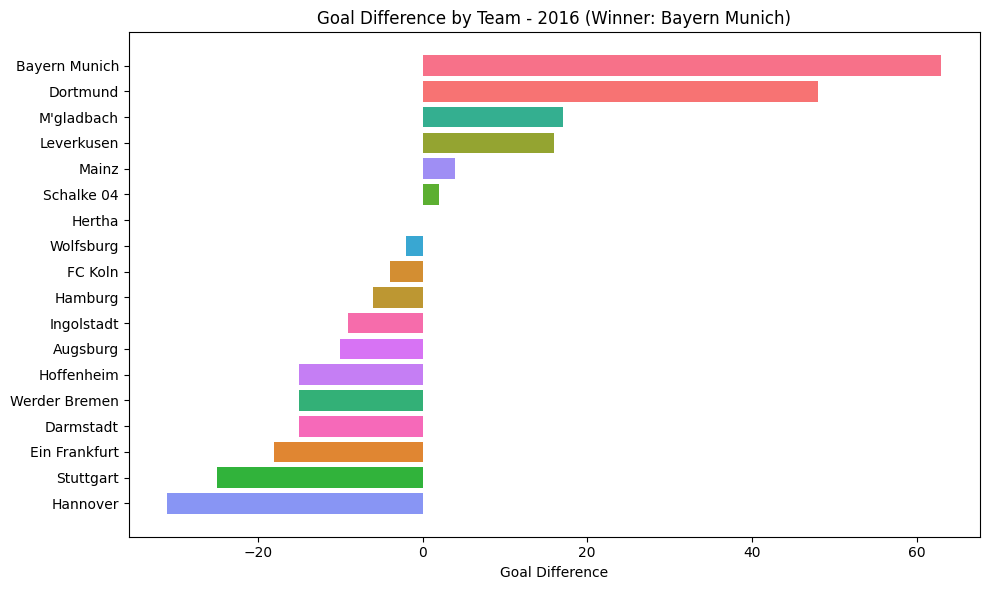

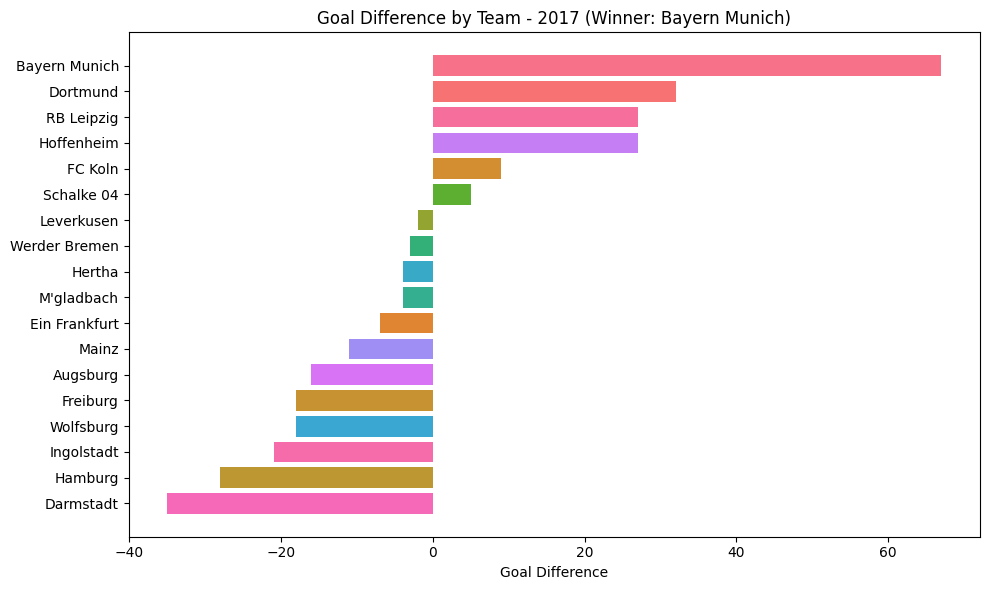

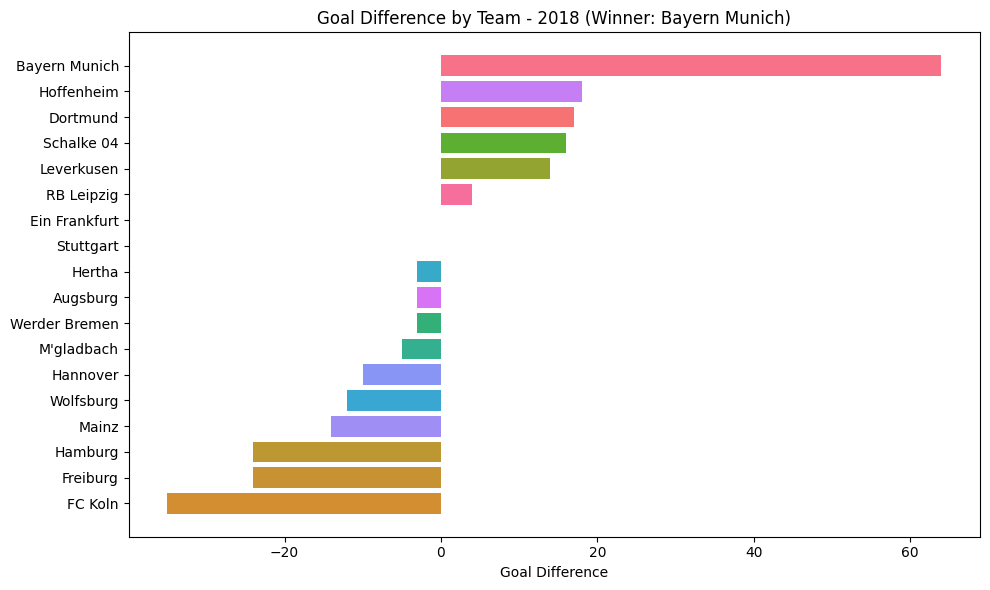

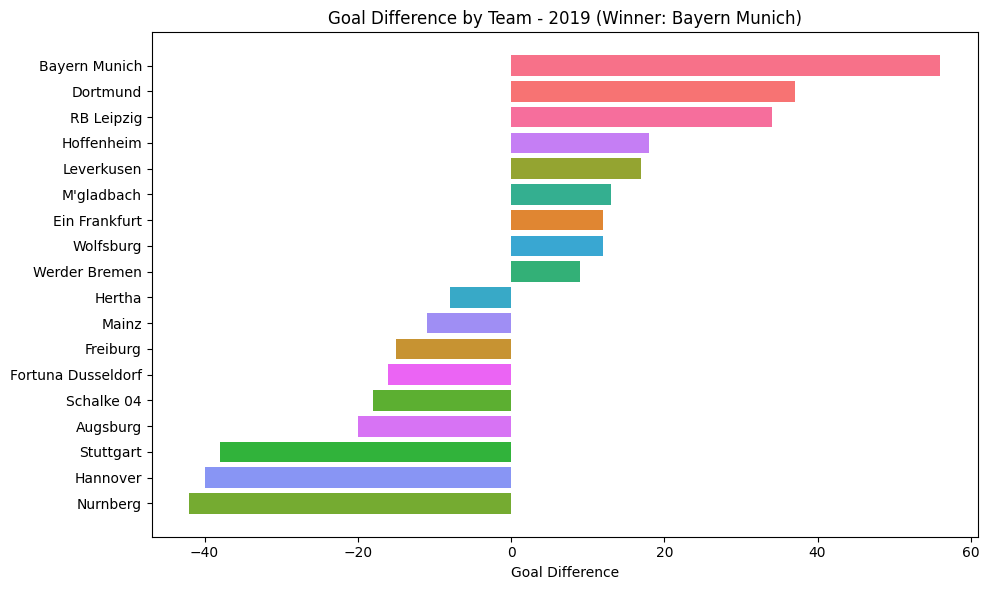

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("bundesliga.csv")
df.columns = df.columns.str.lower()

# Goal difference per match
df['home_gd'] = df['fthg'] - df['ftag']
df['away_gd'] = df['ftag'] - df['fthg']

# Calculate goal difference per team per season
home = df.groupby(['season', 'hometeam']).agg(goals_scored=('fthg', 'sum'), goals_conceded=('ftag', 'sum')).reset_index()
away = df.groupby(['season', 'awayteam']).agg(goals_scored=('ftag', 'sum'), goals_conceded=('fthg', 'sum')).reset_index()

home.rename(columns={'hometeam': 'team'}, inplace=True)
away.rename(columns={'awayteam': 'team'}, inplace=True)

combined = pd.concat([home, away])
season_gd = combined.groupby(['season', 'team']).sum().reset_index()
season_gd['goal_diff'] = season_gd['goals_scored'] - season_gd['goals_conceded']

# Assign unique color per team
unique_teams = season_gd['team'].unique()
palette = sns.color_palette("husl", len(unique_teams))
team_color_map = dict(zip(unique_teams, palette))

# Plot each season
for season in sorted(season_gd['season'].unique()):
    data = season_gd[season_gd['season'] == season].sort_values(by='goal_diff', ascending=True)
    colors = [team_color_map[team] for team in data['team']]
    plt.figure(figsize=(10, 6))
    plt.barh(data['team'], data['goal_diff'], color=colors)
    winner = data.loc[data['goal_diff'].idxmax(), 'team']
    plt.title(f"Goal Difference by Team - {season} (Winner: {winner})")
    plt.xlabel("Goal Difference")
    plt.tight_layout()
    plt.show()
